\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-6
## Given

\begin{center}
\includegraphics{images/fig1}
\end{center}

## Find
Find the reaction forces and plot the shear and bending diagram.

## Solution
### Reaction Forces

\begin{center}
\includegraphics{images/fig2}
\end{center}

In [2]:
# Getting the reaction forces
Oy_sym, Mo_sym = sp.symbols('O_y M_o')
Oy = 240 + 500
Mo = 500*8 + 240*17
display(sp.Eq(Oy_sym, Oy), sp.Eq(Mo_sym, Mo))  # lbf and lbf*in

Eq(O_y, 740)

Eq(M_o, 8080)

### Bending and Moment Diagram

\begin{center}
\includegraphics{images/fig3}
\end{center}

The equation may be described as the piecewise relationship coded below.

In [3]:
V, M, x = sp.symbols('V M x')

# From O to A
V1 = Oy
M1 = -Mo + Oy*x

# From A to B
V2 = Oy - 500
M2 = -Mo + Oy*x - 500*(x - 8)

# From B to C
V3 = Oy - 500 - 40*(x - 14)
M3 = -Mo + Oy*x - 500*(x - 8) - 40*(x - 14)*(x - 14)/2

eq1 = sp.Eq(V, sp.Piecewise((V1, (x >= 0) & (x < 8)), (V2, (x >= 8) & (x < 14)), (V3, (x >= 14) & (x <= 20))))
eq2 = sp.Eq(M, sp.Piecewise((M1, (x >= 0) & (x < 8)), (M2, (x >= 8) & (x < 14)), (M3, (x >= 14) & (x <= 20))))
display(eq1, eq2)

Eq(V, Piecewise((740, (x >= 0) & (x < 8)), (240, (x >= 8) & (x < 14)), (800 - 40*x, (x >= 14) & (x <= 20))))

Eq(M, Piecewise((740*x - 8080, (x >= 0) & (x < 8)), (240*x - 4080, (x >= 8) & (x < 14)), (240*x - (x - 14)*(40*x - 560)/2 - 4080, (x >= 14) & (x <= 20))))

The important key points for shear is shown in the piecewise function expression above. The key points for the bending moment are,

In [4]:
points = ['O', 'A', 'B', 'C']
values = [0, 8, 14, 20]
for p, v in zip(points, values):
    display(sp.Eq(sp.Symbol(f'M_{p}'), eq2.rhs.subs(x, v)))

Eq(M_O, -8080)

Eq(M_A, -2160)

Eq(M_B, -720)

Eq(M_C, 0)

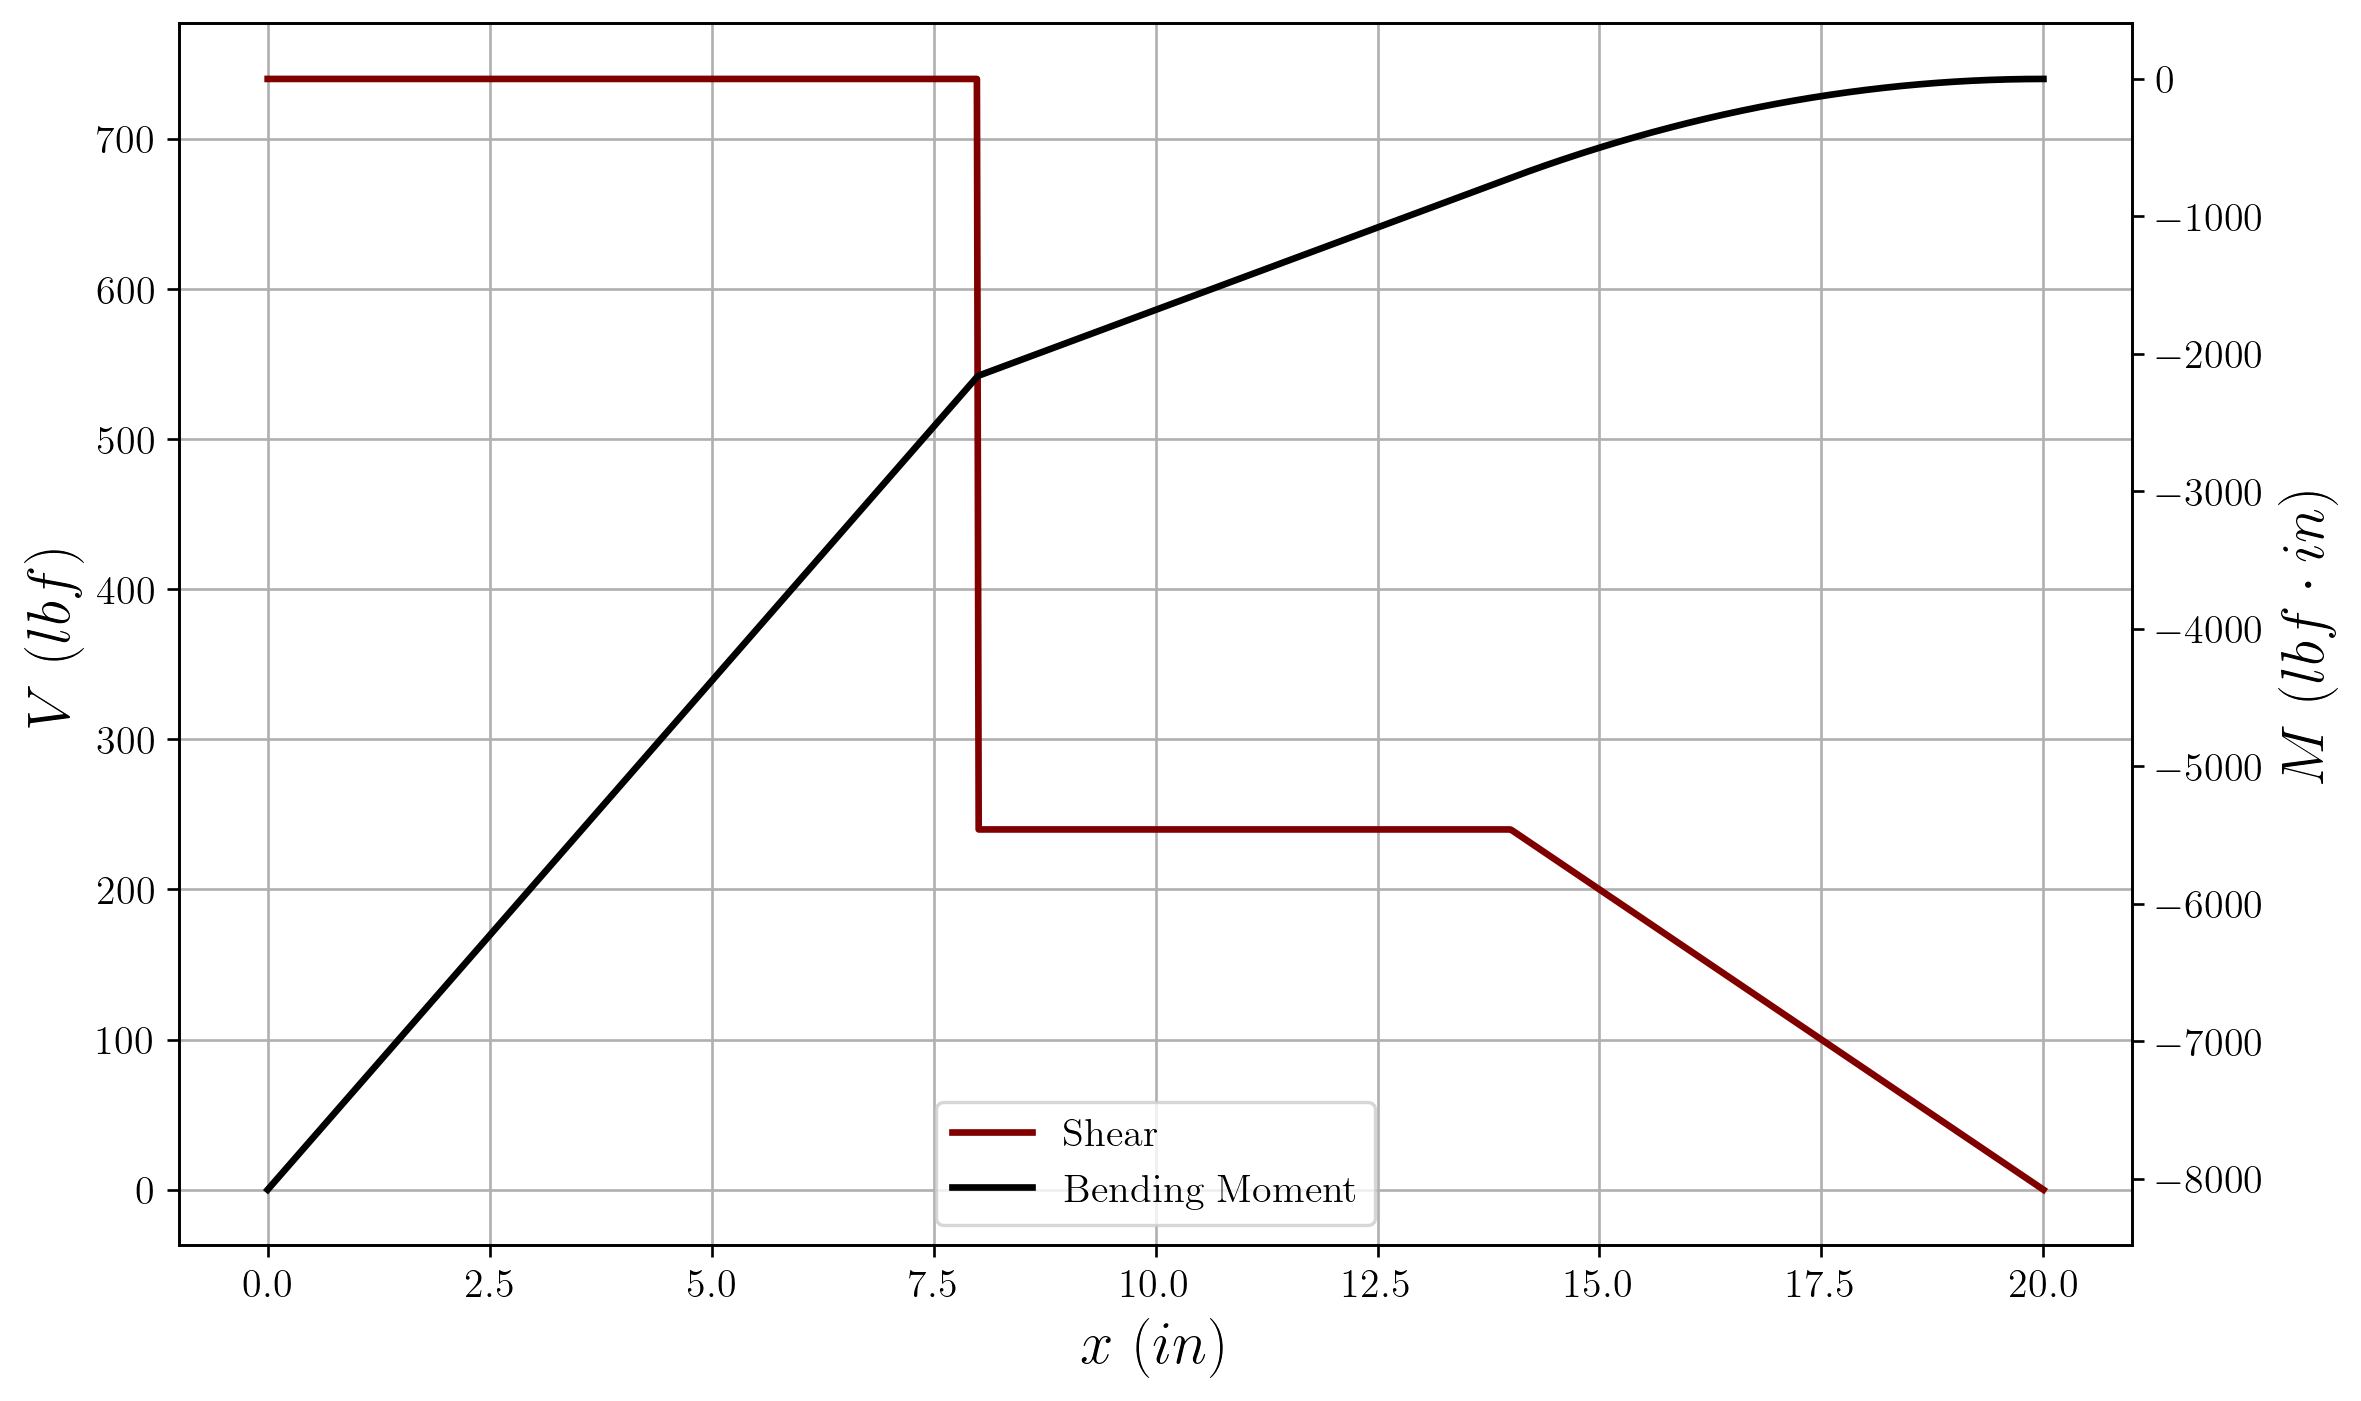

In [5]:
# Getting shear and bending diagram
x_ = np.linspace(0, 20, 1000)
V_ = sp.lambdify(x, eq1.rhs, modules='numpy')
M_ = sp.lambdify(x, eq2.rhs, modules='numpy')

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(x_, V_(x_), label='Shear')
ax2.plot(x_, M_(x_), label='Bending Moment', color='black')

ax2.grid(visible=False)
ax.legend(handles=[ax.lines[0], ax2.lines[0]], loc='lower center')

ax.set_xlabel('$x$ ($in$)')
ax.set_ylabel('$V$ ($lbf$)')
ax2.set_ylabel(r'$M$ ($lbf\cdot in$)')
plt.show()

Notice that the graph has a duel y-axis.